In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset from the raw data

df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [4]:
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
# eda

df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
df_test.shape


(5681, 11)

In [7]:
df_train.shape


(8523, 12)

In [8]:
# Now we will combine the df_test and df_train into one frame by  ignoring the index

df_test['Source']='df_test'
df_train['Source']='df_train'
df_test['Item_Outlet_Sales']=0.0

#Concatenating the data in df variable
df_combinedata=pd.concat([df_test,df_train],sort=False,ignore_index=True)
df_combinedata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,df_test,0.0000
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,df_test,0.0000
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,df_test,0.0000
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,df_test,0.0000
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,df_test,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,df_train,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,df_train,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,df_train,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,df_train,1845.5976


In [9]:
df_combinedata.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Source                          0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Checking our Datset has 8 rows with object type data out of which we have created one and one is an identifier column and others we will have to encode them

df_combinedata.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Source                        object
Item_Outlet_Sales            float64
dtype: object

In [11]:
df_combinedata.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

In [12]:
#Identifying of categorical and non-categorical

df_combinedata.nunique()


Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Source                           2
Item_Outlet_Sales             3494
dtype: int64

In [13]:
df_combinedata.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Univariate Analysis

First lets separate categorial features. 

In [14]:
catgor=[feature for feature in df_combinedata.columns if df_combinedata[feature].nunique()<20 and feature!='Source']
catgor

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

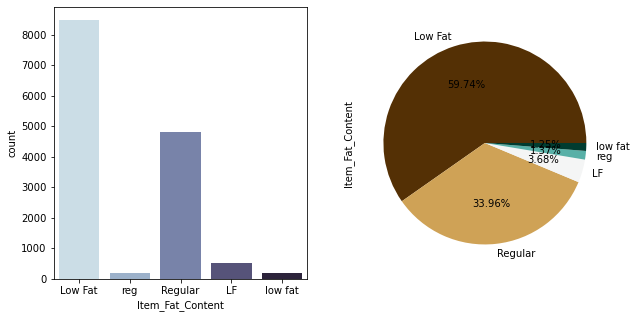

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
df_combinedata['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
plt.subplot(1,2,1)
sb.countplot(df_combinedata['Item_Fat_Content'], palette="ch:s=.25,rot=-.25")
df_combinedata['Item_Fat_Content'].value_counts(ascending = False)

Low Fat products are more than Regular products.Different low fat categories need to be merged. Same must be done with regular categories.

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

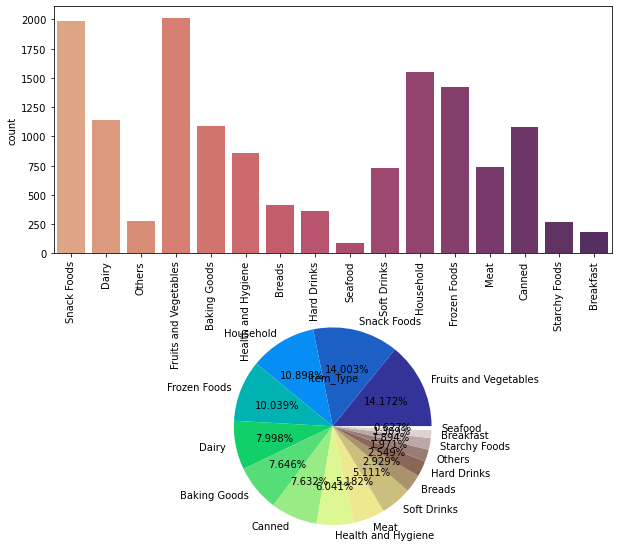

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
df_combinedata['Item_Type'].value_counts().plot.pie(autopct='%1.3f%%',cmap = 'terrain',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2,1,1)
sb.countplot(df_combinedata['Item_Type'], palette = 'flare')
plt.xticks(rotation = 90)
df_combinedata['Item_Type'].value_counts()

Fruits and Vegetables,Snack Foodsand Frozen Foods are the two categories in which most of the items fall whereas Seafood and Breakfast is the least items.

OUT019     880
OUT010     925
OUT017    1543
OUT018    1546
OUT045    1548
OUT049    1550
OUT046    1550
OUT035    1550
OUT013    1553
OUT027    1559
Name: Outlet_Identifier, dtype: int64

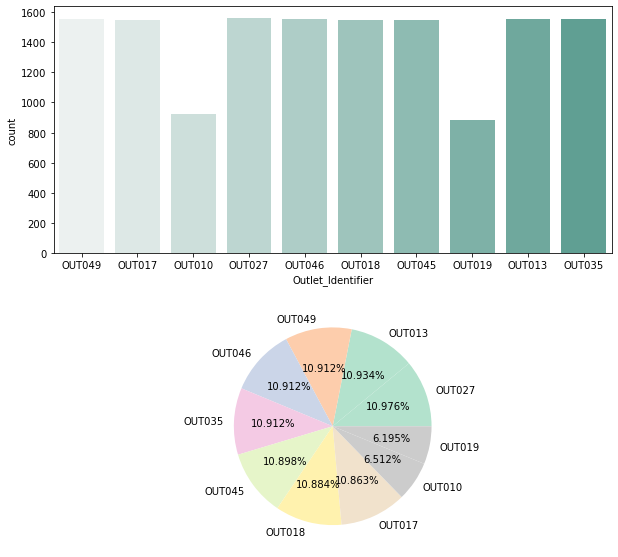

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
df_combinedata['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.3f%%', cmap = 'Pastel2')
plt.ylabel('')
plt.subplot(2,1,1)
sb.countplot(df_combinedata['Outlet_Identifier'], palette = 'light:#5A9')
df_combinedata['Outlet_Identifier'].value_counts(ascending  = True)

Among the total outlets, 10 outlets are almost balanced.

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

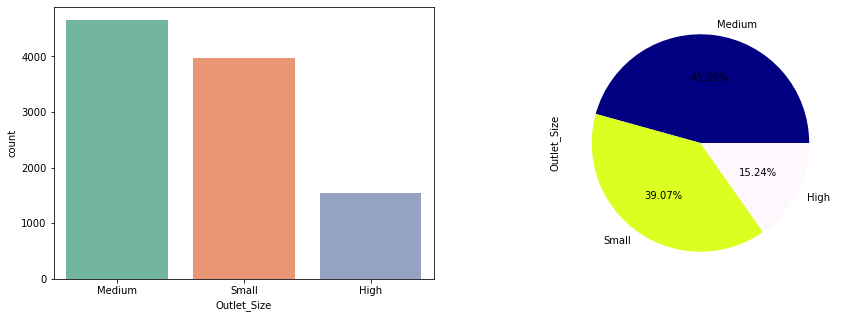

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
df_combinedata['Outlet_Size'].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'gist_ncar')
plt.subplot(1,2,1)
sb.countplot(df_combinedata['Outlet_Size'], palette ='Set2')
df_combinedata['Outlet_Size'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

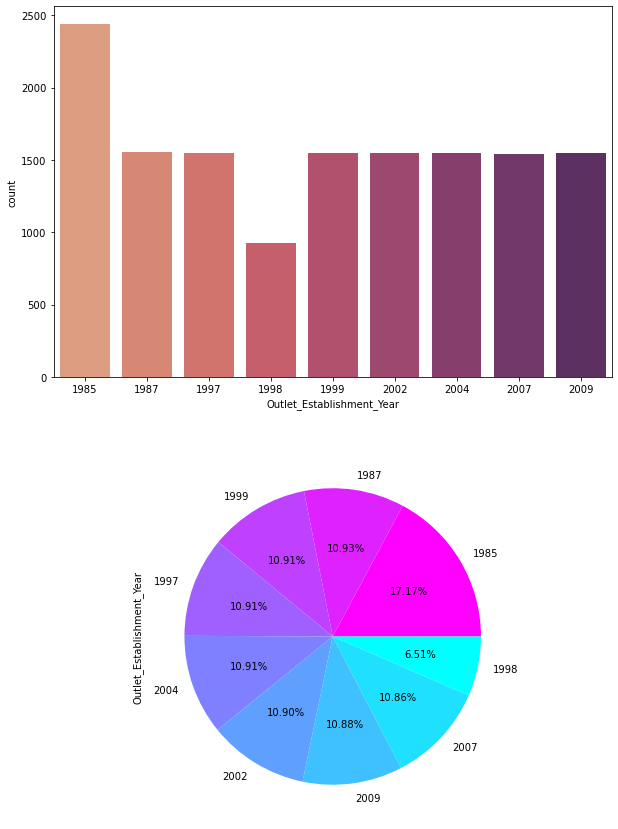

In [19]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,2)
df_combinedata['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'cool_r')
plt.subplot(2,1,1)
sb.countplot(df_combinedata['Outlet_Establishment_Year'], palette = 'flare')
df_combinedata['Outlet_Establishment_Year'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

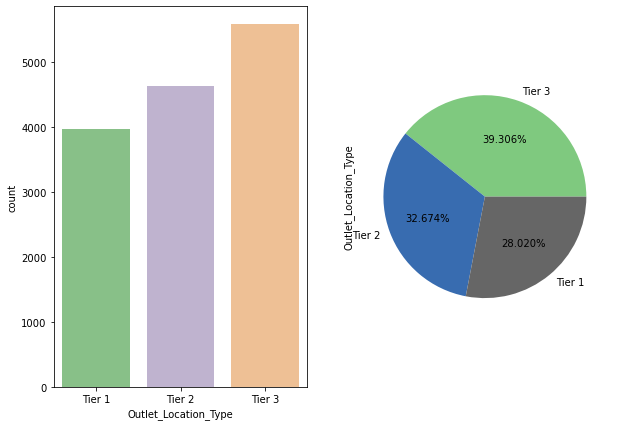

In [20]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
df_combinedata['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.3f%%', cmap = 'Accent')
plt.subplot(1,2,1)
sb.countplot(df_combinedata['Outlet_Location_Type'], palette= 'Accent')
df_combinedata['Outlet_Location_Type'].value_counts()

Most number of stores located in the tier 3 cities.

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

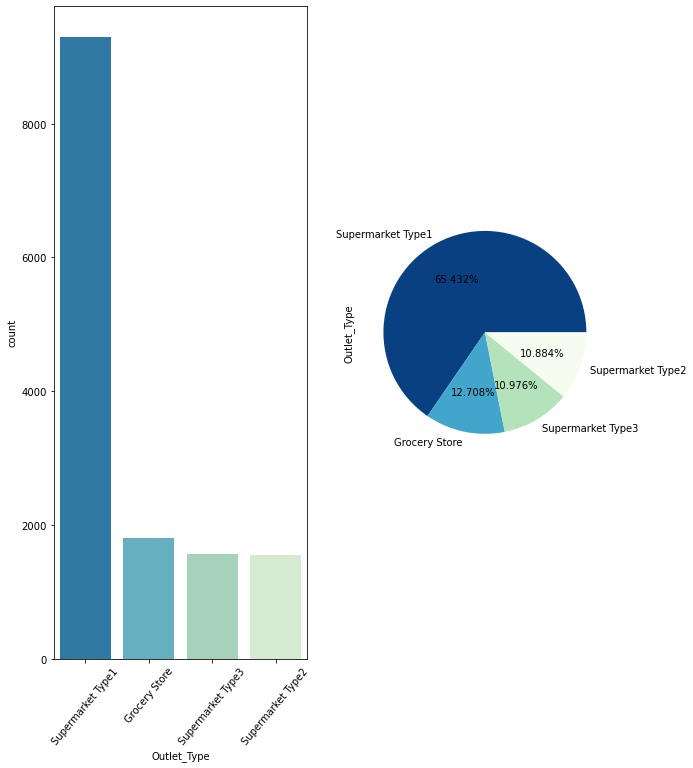

In [21]:
plt.figure(figsize=(10,12))
plt.subplot(1,2,2)
df_combinedata['Outlet_Type'].value_counts().plot.pie(autopct='%1.3f%%', cmap = 'GnBu_r')
plt.subplot(1,2,1)
sb.countplot(df_combinedata['Outlet_Type'], palette = 'GnBu_r')
plt.xticks(rotation=50)
df_combinedata['Outlet_Type'].value_counts()

11% are of Type 2 , 11 % are of Type 3 ,13% are of Grocery Store and 65% are of Supermarket type 1

In [22]:
#Separating the continuous feature

continuousfeature=[feature for feature in df_combinedata.columns if df_combinedata[feature].nunique()>20 and feature!='Item_Identifier' and feature!='Item_Outlet_Sales']
continuousfeature

['Item_Weight', 'Item_Visibility', 'Item_MRP']

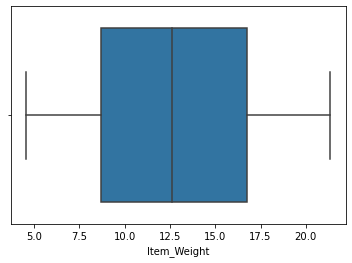

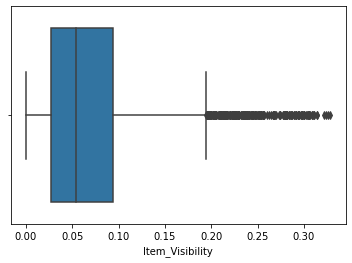

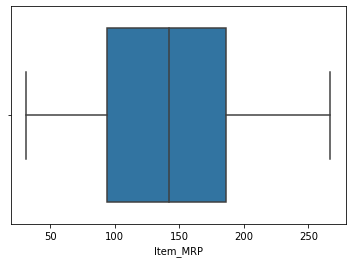

<Figure size 432x288 with 0 Axes>

In [23]:
for feat in continuousfeature:
    sb.boxplot(df_combinedata[feat])
    plt.figure()

Only Item Visibility has large no. of outliers 

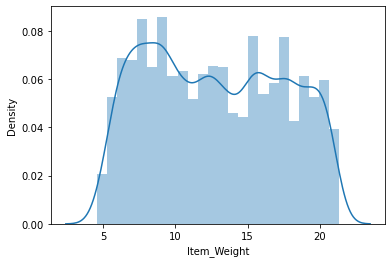

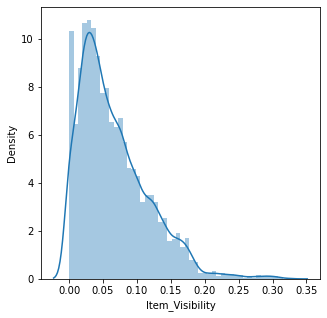

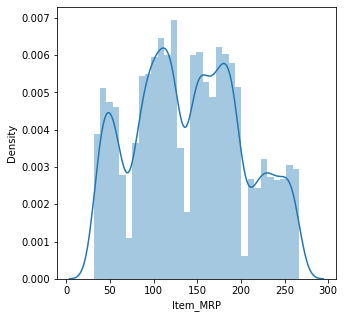

<Figure size 360x360 with 0 Axes>

In [24]:
for feat in continuousfeature:
    sb.distplot(df_combinedata[feat])
    plt.figure(figsize = (5,5))

Item_Visibility is skewed to the right.

# Bivariate Analysis

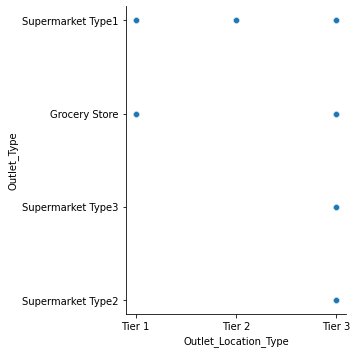

In [25]:
cmap = sb.cubehelix_palette(rot=-.2, as_cmap=True)
sb.relplot(df_combinedata['Outlet_Location_Type'],df_combinedata['Outlet_Type'], palette =  cmap)

Tier 3 cities have only Superkarket type 1 whereas Tier 1 cities have only supermarket 1 and grocery strores

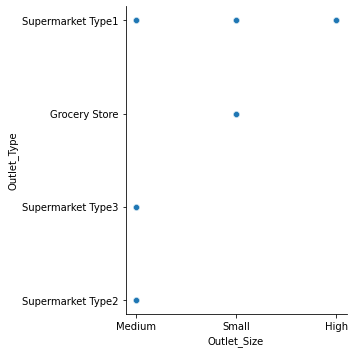

In [26]:
sb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Outlet_Type'], palette = 'muted')

The above relationplot shows that Supermarket type 1 are of all sizes whereas grocery stores are only small and Supermarket type 2.

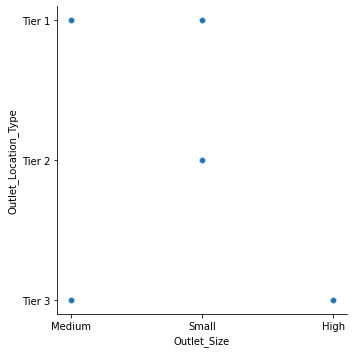

In [27]:
sb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Outlet_Location_Type'],palette = 'muted')


The above relplot shows that high Outlet_Size is only found in tier 3 cities as well as Tier 2 citis have only small Outlet_Size.

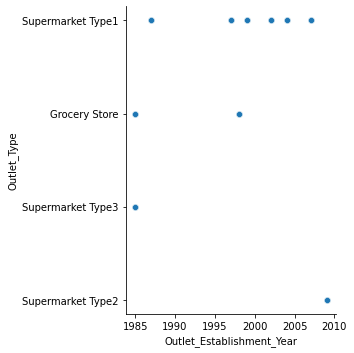

In [28]:
sb.relplot(df_combinedata['Outlet_Establishment_Year'],df_combinedata['Outlet_Type'])


Grocery stores and supermarket are the oldest outlet type of them all which is represented in relplot .

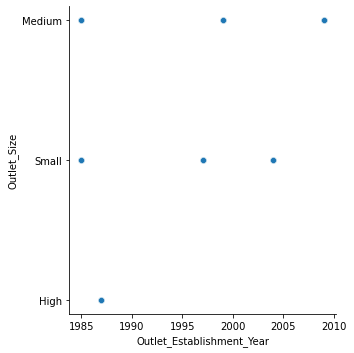

In [29]:
sb.relplot(df_combinedata['Outlet_Establishment_Year'],df_combinedata['Outlet_Size'])


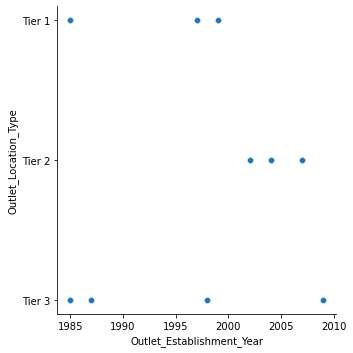

In [30]:
sb.relplot(df_combinedata['Outlet_Establishment_Year'],df_combinedata['Outlet_Location_Type'],palette='muted')


According to the relplot Tier1 and tier2 cities outlet_Establishment_Year were established in 1985 whereas tier2 got outlets after 2000.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT017'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT027'),
  Text(4, 0, 'OUT046'),
  Text(5, 0, 'OUT018'),
  Text(6, 0, 'OUT045'),
  Text(7, 0, 'OUT019'),
  Text(8, 0, 'OUT013'),
  Text(9, 0, 'OUT035')])

<Figure size 720x720 with 0 Axes>

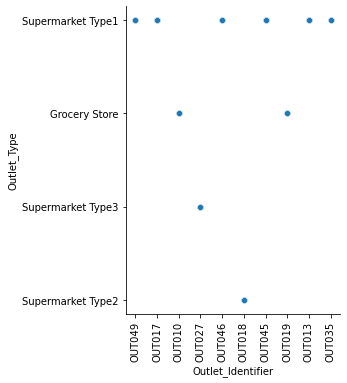

In [31]:
plt.figure(figsize=(10,10))
sb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Outlet_Type'])
plt.xticks(rotation=90)

There is only one outlet identifier for supermarket 2 and 3 while most of the outlet identifier belong to supermarket 1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT017'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT027'),
  Text(4, 0, 'OUT046'),
  Text(5, 0, 'OUT018'),
  Text(6, 0, 'OUT045'),
  Text(7, 0, 'OUT019'),
  Text(8, 0, 'OUT013'),
  Text(9, 0, 'OUT035')])

<Figure size 1440x432 with 0 Axes>

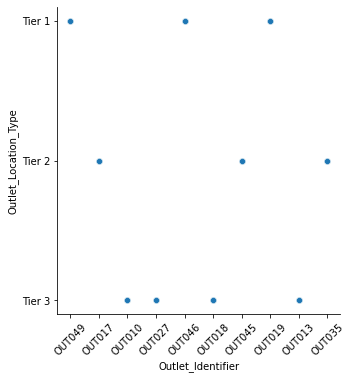

In [32]:
plt.figure(figsize=(20,6))
sb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Outlet_Location_Type'])
plt.xticks(rotation=45)

Tier 3 has the most diff types of outlets, but they are almost balanced.

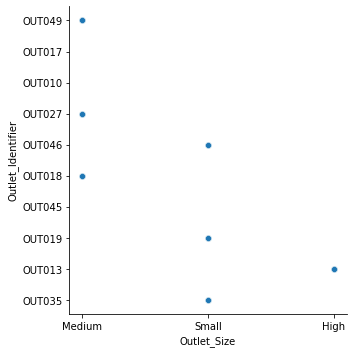

In [33]:
sb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Outlet_Identifier'])


Only Outlet 13 with high outlet size. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT017'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT027'),
  Text(4, 0, 'OUT046'),
  Text(5, 0, 'OUT018'),
  Text(6, 0, 'OUT045'),
  Text(7, 0, 'OUT019'),
  Text(8, 0, 'OUT013'),
  Text(9, 0, 'OUT035')])

<Figure size 1440x432 with 0 Axes>

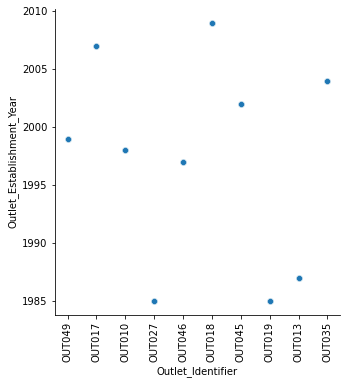

In [34]:
plt.figure(figsize=(20,6))
sb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Outlet_Establishment_Year'])
plt.xticks(rotation=90)

According to the figure - outlet 27 and 19 are the oldest outlet identifier and outlet 18 is the newest.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT017'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT027'),
  Text(4, 0, 'OUT046'),
  Text(5, 0, 'OUT018'),
  Text(6, 0, 'OUT045'),
  Text(7, 0, 'OUT019'),
  Text(8, 0, 'OUT013'),
  Text(9, 0, 'OUT035')])

<Figure size 1440x1152 with 0 Axes>

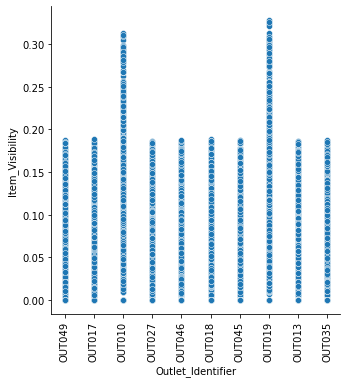

In [35]:
plt.figure(figsize=(20,16))
sb.relplot(df_combinedata['Outlet_Identifier'],df_combinedata['Item_Visibility'])

plt.xticks(rotation=90)

Only Outlet 10 and 19 gives the highest visibilty.



([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

<Figure size 1440x1152 with 0 Axes>

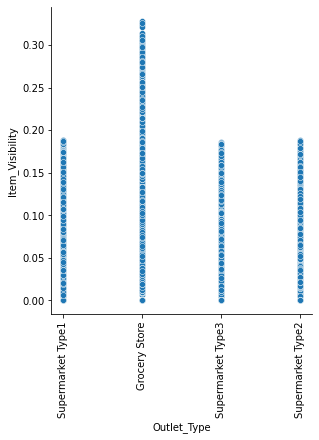

In [36]:
plt.figure(figsize=(20,16))
sb.relplot(df_combinedata['Outlet_Type'],df_combinedata['Item_Visibility'])
plt.xticks(rotation=90)

Grocery stores shows more output rather than any other super markets types.

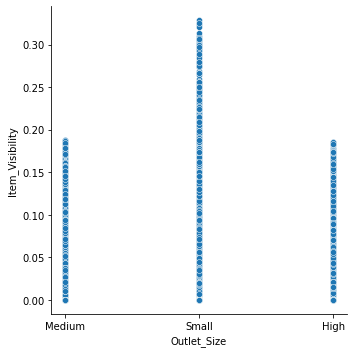

In [37]:
sb.relplot(df_combinedata['Outlet_Size'],df_combinedata['Item_Visibility'])


Smallest Stores gives the more visibility to products

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low Fat'),
  Text(1, 0, 'reg'),
  Text(2, 0, 'Regular'),
  Text(3, 0, 'LF'),
  Text(4, 0, 'low fat')])

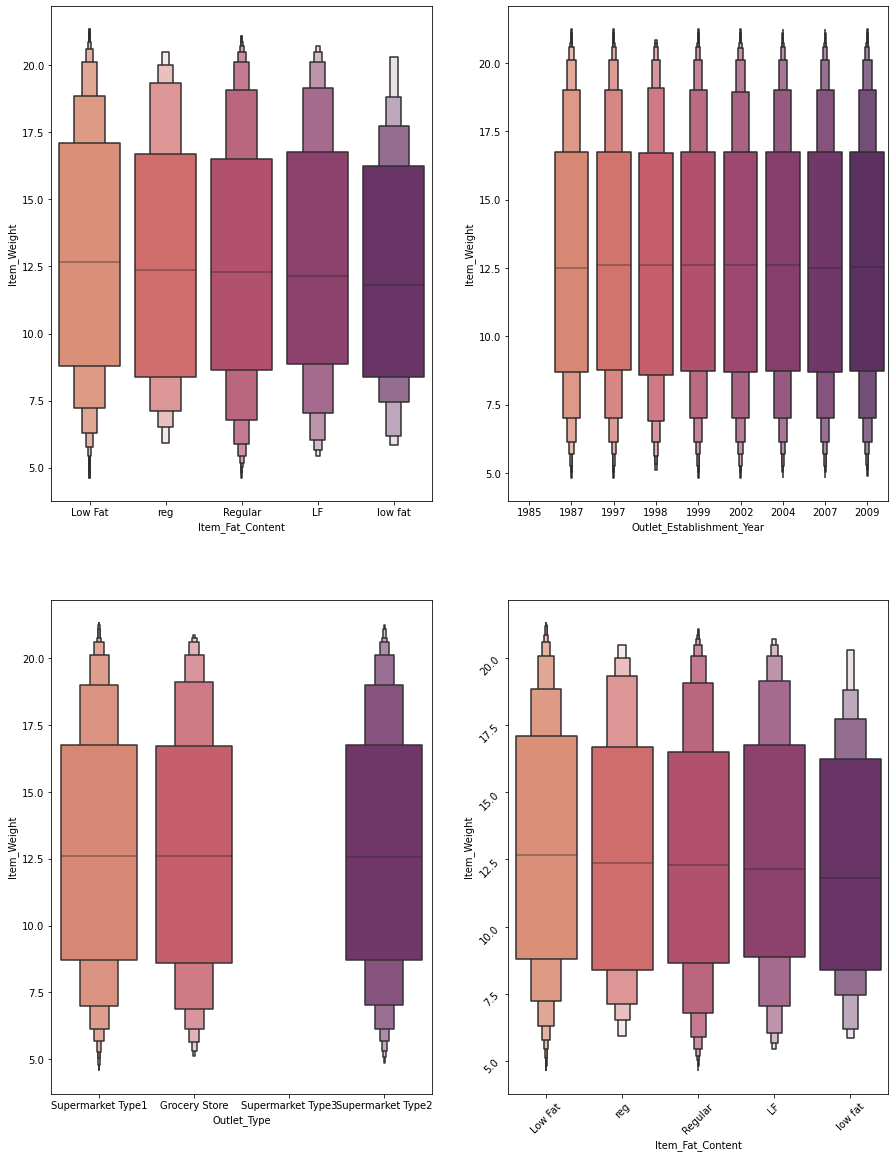

In [38]:
fig,ax=plt.subplots(2,2,figsize=(15,20))
plt.yticks(rotation=45)
l=0
p=0
for b,n in enumerate(['Item_Fat_Content','Outlet_Establishment_Year','Outlet_Type','Item_Fat_Content']):
    if b%2==0 and b>0:
        l+=1
        p=0
    sb.boxenplot(x=df_combinedata[n],y=df_combinedata['Item_Weight'],ax=ax[l,p],showfliers = False,palette='flare')
    p+=1
    
plt.xticks(rotation=45)

Weight of Data is missing for Supermarket 3 and for year 1985, Median of low fat content is lowest. 

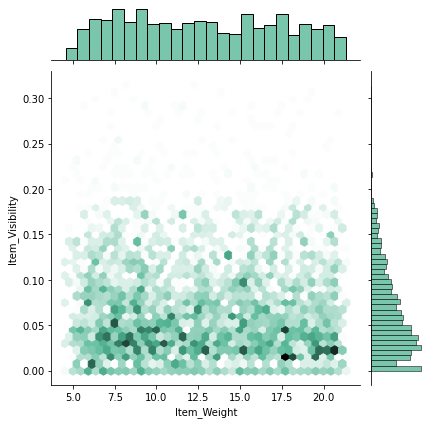

<Figure size 432x288 with 0 Axes>

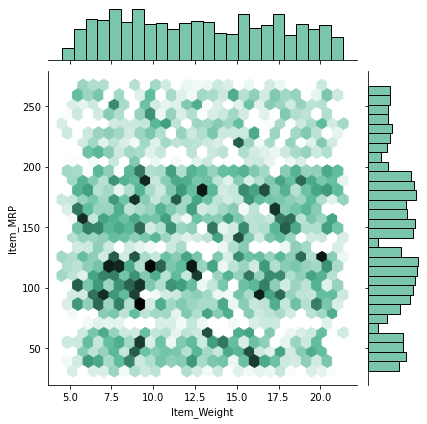

<Figure size 432x288 with 0 Axes>

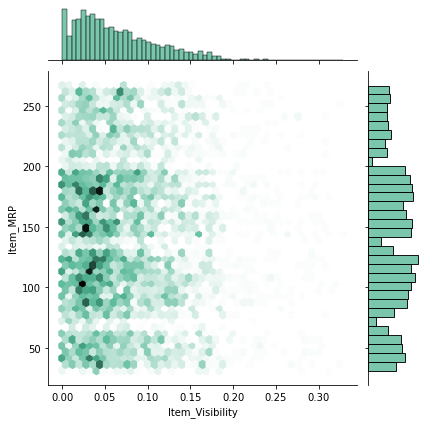

<Figure size 432x288 with 0 Axes>

In [39]:
for r in range(len(continuousfeature)):
    for s in range(r+1,len(continuousfeature)):
        sb.jointplot(x=continuousfeature[r],y=continuousfeature[s],data=df_combinedata,kind="hex", color="#4CB391")
        plt.figure()

Lesser products with high visibility seems to exist no correlation between the above continuous features.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

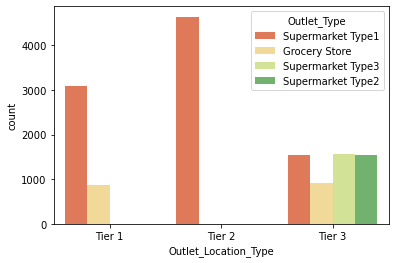

In [40]:
sb.countplot(df_combinedata['Outlet_Location_Type'],hue=df_combinedata['Outlet_Type'], palette='RdYlGn')


Tier 3 cities have all types of Outlets.Tier 2 cities have the highest number of supermarket 2.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

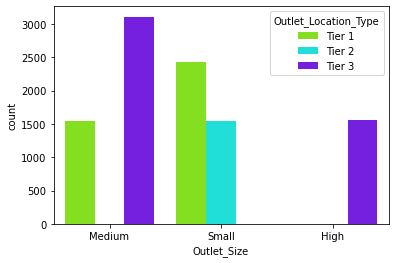

In [41]:
sb.countplot(df_combinedata['Outlet_Size'],hue=df_combinedata['Outlet_Location_Type'], palette = 'hsv')


Tier 3 cities have the highest no. of medioum size outlet and tier 1 cities have highest no. small size outlets.Tier 3 cities have the least no. of stores 

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

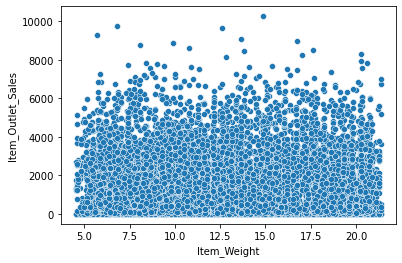

In [42]:
sb.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df_combinedata,palette = dict(Yes="m", No="g"))


No relation between Item_Weight and Item_Outlet_Sales.

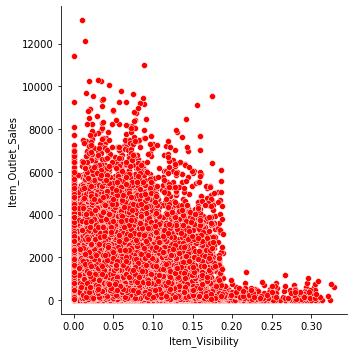

In [43]:
sb.relplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df_combinedata, color= 'red')

Item outlet sales sharply decreases for the most visible items

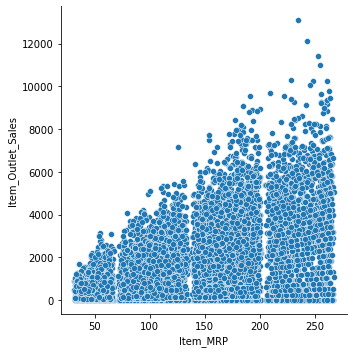

In [44]:
sb.relplot(x='Item_MRP',y='Item_Outlet_Sales',data=df_combinedata, palette = 'RdGy')


As the MRP of an item increases item outlet sales also increases

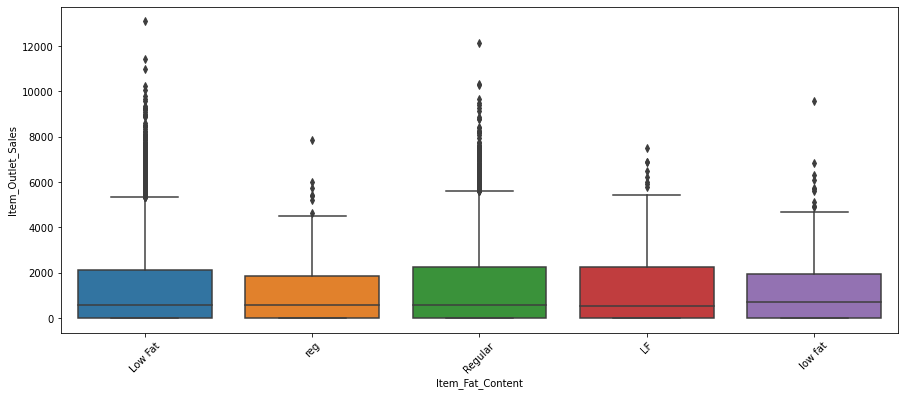

<Figure size 432x288 with 0 Axes>

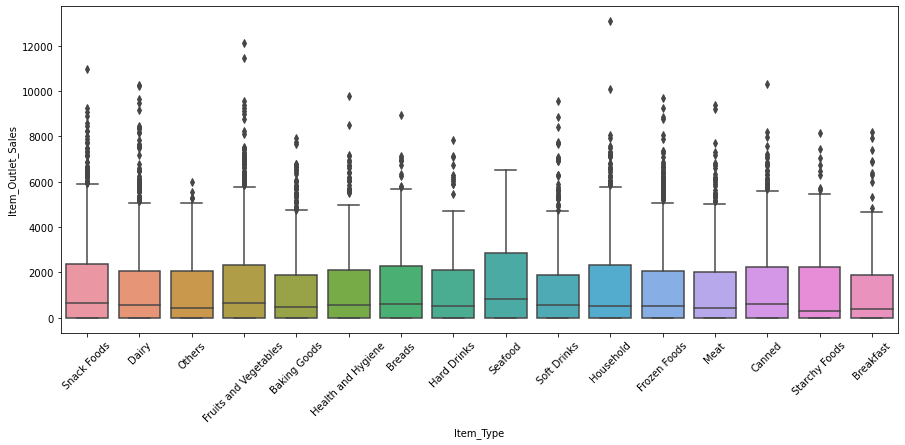

<Figure size 432x288 with 0 Axes>

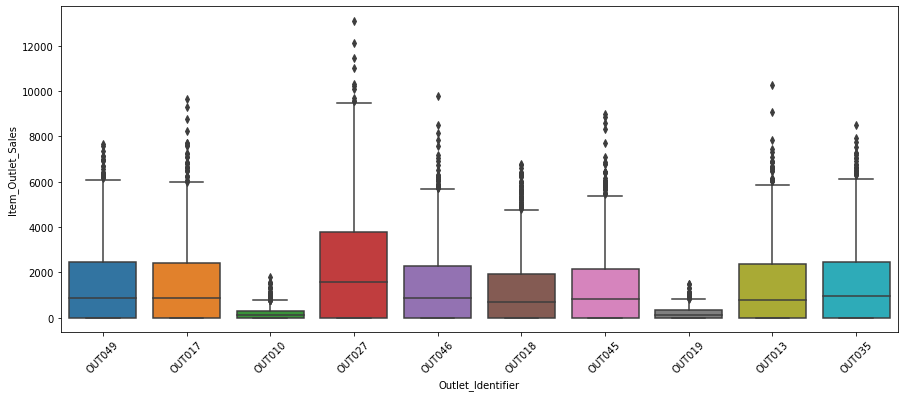

<Figure size 432x288 with 0 Axes>

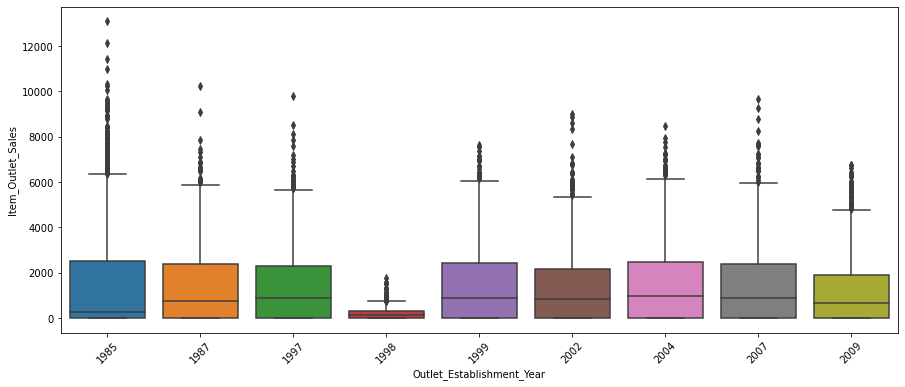

<Figure size 432x288 with 0 Axes>

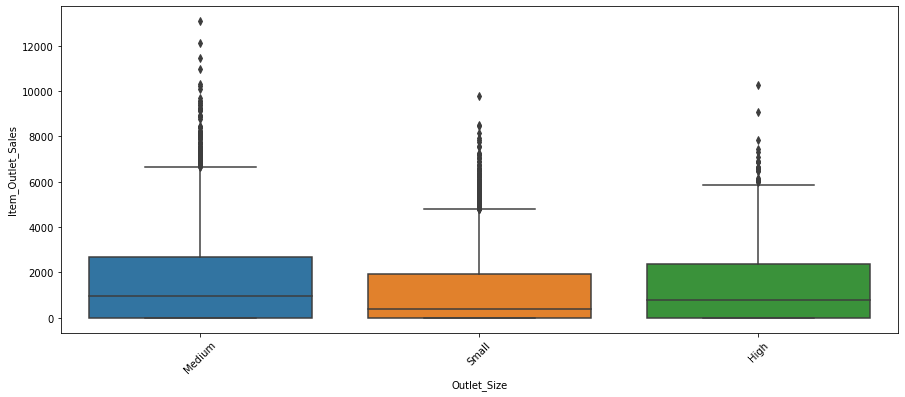

<Figure size 432x288 with 0 Axes>

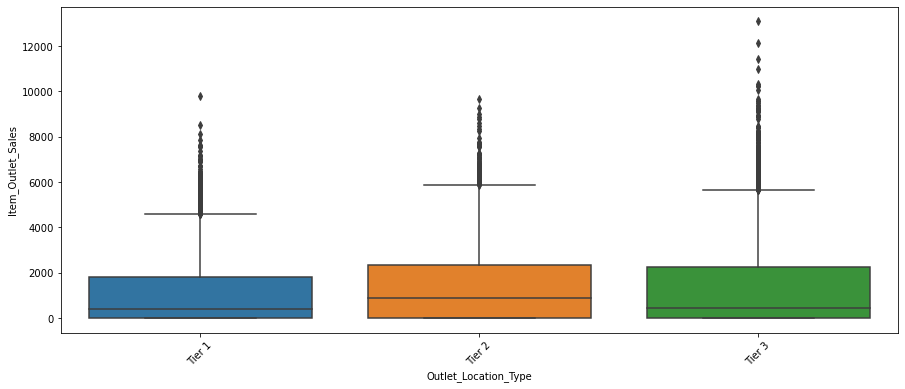

<Figure size 432x288 with 0 Axes>

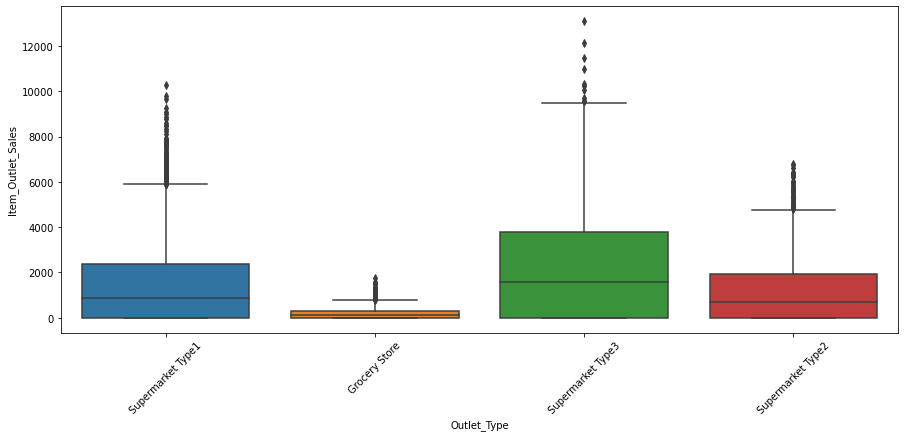

<Figure size 432x288 with 0 Axes>

In [45]:
for i in catgor:
    plt.figure(figsize=(15,6))
    sb.boxplot(x=df_combinedata[i],y=df_combinedata['Item_Outlet_Sales'])
    plt.xticks(rotation=45)
    plt.figure()

Seafood, Vegetables and Fruits contribute towards the Item_Outlet_Sales. Medium size outlets and Supermarket 3 gives the most item outlet sales.

# Multivariate Analysis


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

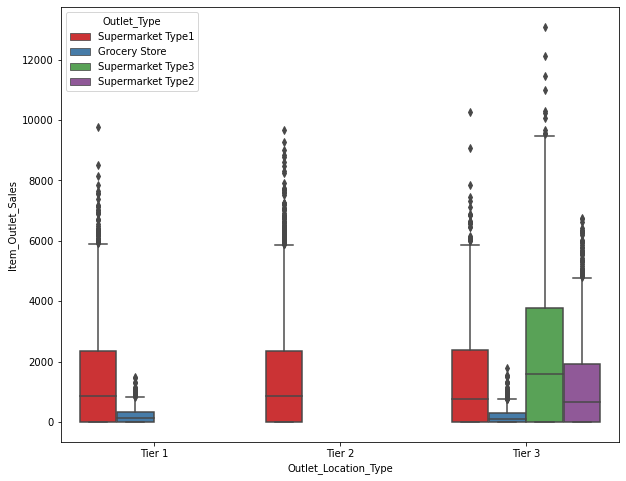

In [46]:
plt.figure(figsize=(10,8))
sb.boxplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df_combinedata, palette = 'Set1')

Locations consisting Tier 3 have the most sales.


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

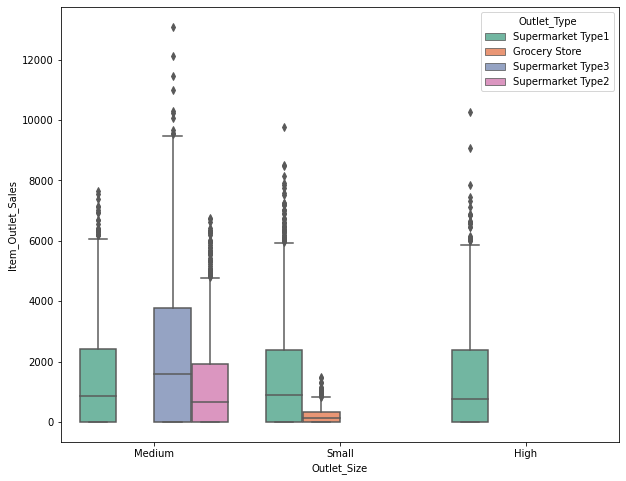

In [47]:
plt.figure(figsize=(10,8))
sb.boxplot('Outlet_Size','Item_Outlet_Sales',hue='Outlet_Type',data=df_combinedata, palette = 'Set2')


According to boxplot graph it can be seen that medium size outlets sell more item and also they have the huge type of outlets therefore the sales increases even more

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

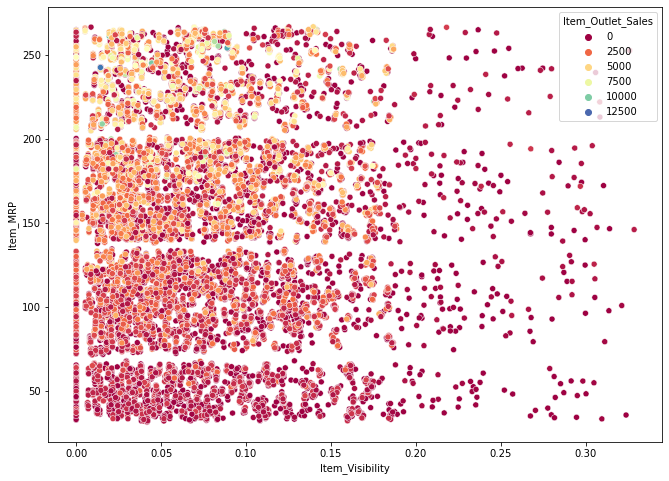

In [48]:
plt.figure(figsize=(11,8))
sb.scatterplot('Item_Visibility','Item_MRP',hue='Item_Outlet_Sales',data=df_combinedata,palette='Spectral')


Item_Outlet_Sales increases with high item price and low item visibility.



<AxesSubplot:>

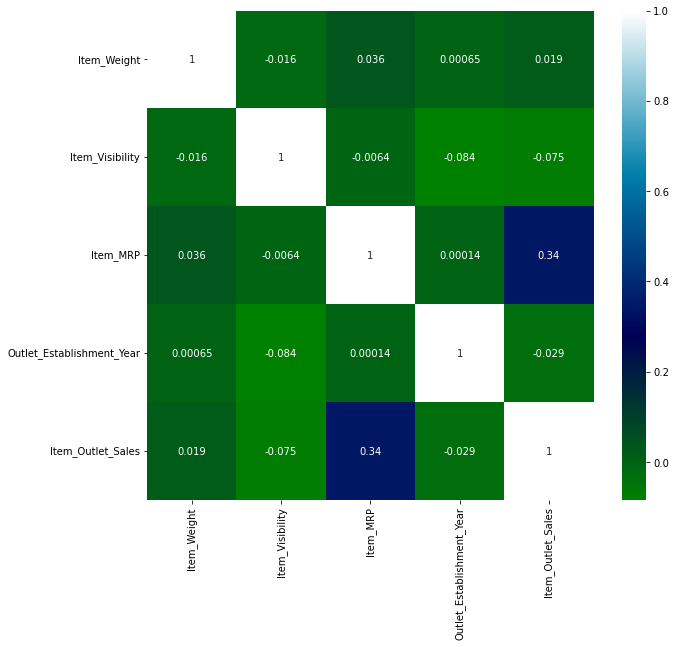

In [49]:
plt.figure(figsize=(10,9))
sb.heatmap(df_combinedata.corr(),annot=True, cmap = 'ocean')

MRP has the strongest positive correlation with Item_Outlet_Sales, while visibility and establishment show a little negative correlation.

# Feature Engineering

Handling Missing Values

Item_Visibility

In [50]:
df_combinedata['Item_Visibility'].value_counts()

0.000000    879
0.076841      3
0.077290      3
0.076792      3
0.076975      3
           ... 
0.110513      1
0.076554      1
0.031333      1
0.084679      1
0.044878      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [51]:
#Replacing 0 visibility with nan values

df_combinedata['Item_Visibility'].replace(0,np.nan,inplace=True)
df_combinedata['Item_Visibility'].min()

0.003574698

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'Small'), Text(2, 0, 'High')])

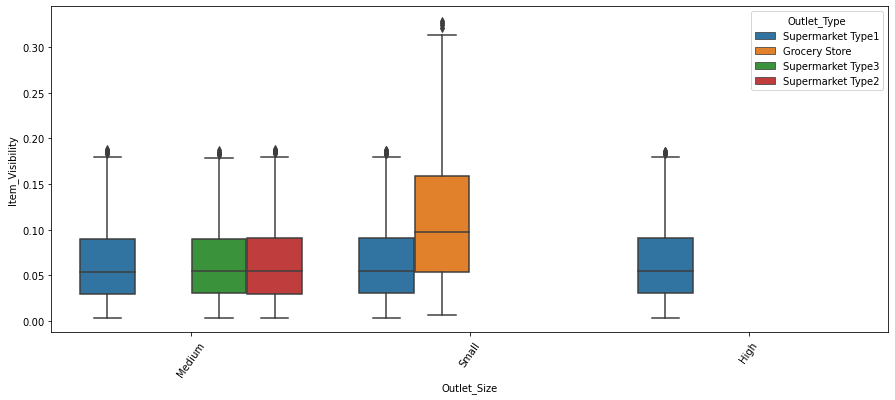

In [52]:
#Checking visibility in Outlet size with Outlet type

plt.figure(figsize=(15,6))
sb.boxplot(data=df_combinedata, x='Outlet_Size', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=55)

Item_visibility contains missing values(NaN)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT017'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT027'),
  Text(4, 0, 'OUT046'),
  Text(5, 0, 'OUT018'),
  Text(6, 0, 'OUT045'),
  Text(7, 0, 'OUT019'),
  Text(8, 0, 'OUT013'),
  Text(9, 0, 'OUT035')])

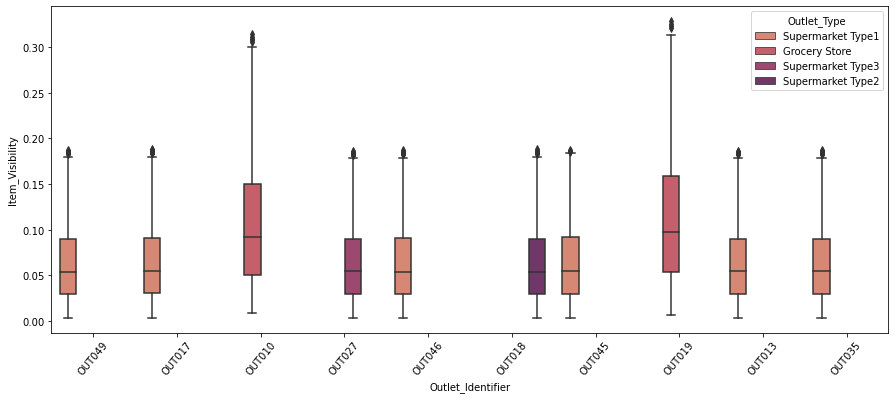

In [53]:
#Checking visibility in Outlet identifier with Outlet type

plt.figure(figsize=(15,6))
sb.boxplot(data=df_combinedata, x='Outlet_Identifier', y='Item_Visibility', hue='Outlet_Type', palette = 'flare')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Snack Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Baking Goods'),
  Text(5, 0, 'Health and Hygiene'),
  Text(6, 0, 'Breads'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Household'),
  Text(11, 0, 'Frozen Foods'),
  Text(12, 0, 'Meat'),
  Text(13, 0, 'Canned'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Breakfast')])

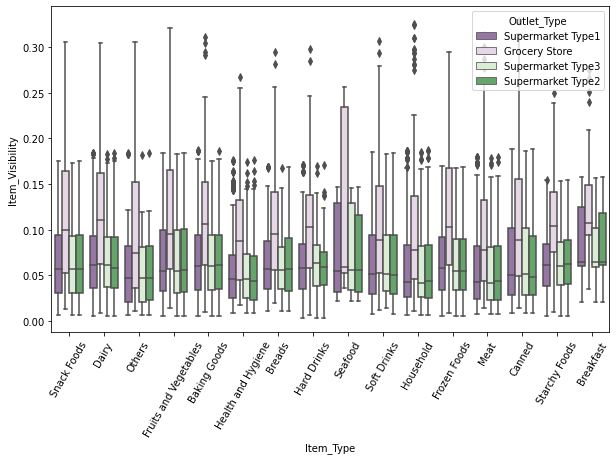

In [54]:
#Checking visibility in Item type with Outlet type

plt.figure(figsize=(10,6))
sb.boxplot(data=df_combinedata, x='Item_Type', y='Item_Visibility', hue='Outlet_Type', palette = 'PRGn')
plt.xticks(rotation=60)

No missing values for missing visibility hence this can be used to fill nan values in visibility column

In [55]:
#Creating pivot table to help fill nan values of visibility from here

outlet_table = df_combinedata.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
outlet_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [56]:
# replace the nan values
# define function that returns the mean values
def find_mean(z):
    return outlet_table.loc[z['Item_Type'], z['Outlet_Type']]

# replace missing values in visibility with mean values from above pivot table
df_combinedata['Item_Visibility'].fillna(df_combinedata[df_combinedata['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

In [57]:
#we try to fill the nan values of wieht by using values from item identifier
item_weight_table = df_combinedata.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [58]:
def find_wt(s):
    return item_weight_table.loc[s['Item_Identifier'],'Item_Weight']

df_combinedata['Item_Weight'].fillna(df_combinedata[df_combinedata['Item_Weight'].isnull()].apply(find_wt, axis=1), inplace=True)

In [59]:
df_combinedata['Outlet_Size'].replace(np.NaN,'Unknown',inplace=True)


In [60]:
from scipy.stats import mode


In [61]:
Outlet__table = df_combinedata.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
Outlet__table

,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Grocery stores are usually smaller than super markets so we will replace NaN values by small



In [62]:
#Filling nan values with mode

df_combinedata['Outlet_Size'].replace('Unknown','Small',inplace=True)

<AxesSubplot:>

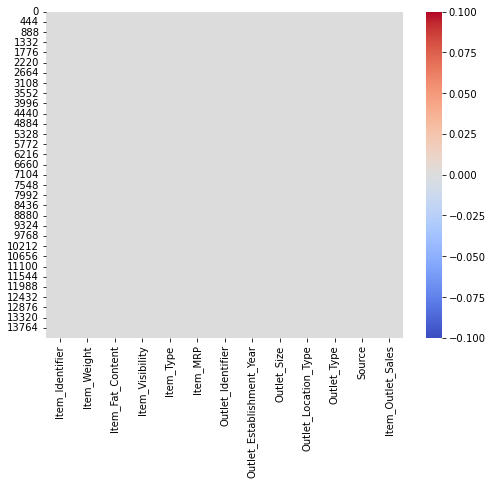

In [63]:
plt.figure(figsize=(8,6))
sb.heatmap(df_combinedata.isnull(),cmap='coolwarm')

# Engineering

Item_Identifier

In [64]:
df_combinedata['Item_Identifier']=df_combinedata['Item_Identifier'].apply(lambda x: x[:-2])


In [65]:
df_combinedata['Item_Identifier'].unique()


array(['FDW', 'NCN', 'FDQ', 'FDY', 'FDH', 'FDL', 'FDC', 'FDN', 'FDA',
       'FDT', 'NCC', 'FDU', 'DRL', 'FDM', 'FDI', 'DRC', 'NCM', 'NCJ',
       'FDG', 'NCL', 'FDS', 'FDX', 'NCF', 'NCE', 'FDE', 'NCR', 'FDR',
       'FDD', 'NCD', 'NCY', 'FDP', 'NCS', 'FDF', 'DRH', 'FDJ', 'FDV',
       'FDB', 'NCW', 'NCX', 'FDZ', 'DRG', 'NCG', 'DRP', 'NCH', 'NCT',
       'NCU', 'FDK', 'DRB', 'FDO', 'NCO', 'DRI', 'DRF', 'DRN', 'NCB',
       'NCI', 'DRM', 'DRK', 'NCP', 'DRD', 'NCZ', 'NCK', 'DRE', 'NCV',
       'DRZ', 'NCQ', 'NCA', 'DRY', 'DRA', 'DRJ', 'DRO', 'DRQ'],
      dtype=object)

In [66]:
df_combinedata['Outlet_Establishment_Year']=(2021.0-df_combinedata['Outlet_Establishment_Year'])
df_combinedata.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source,Item_Outlet_Sales
0,FDW,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,22.0,Medium,Tier 1,Supermarket Type1,df_test,0.0
1,FDW,8.300,reg,0.038428,Dairy,87.3198,OUT017,14.0,Small,Tier 2,Supermarket Type1,df_test,0.0
2,NCN,14.600,Low Fat,0.099575,Others,241.7538,OUT010,23.0,Small,Tier 3,Grocery Store,df_test,0.0
3,FDQ,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,14.0,Small,Tier 2,Supermarket Type1,df_test,0.0
4,FDY,13.600,Regular,0.118599,Dairy,234.2300,OUT027,36.0,Medium,Tier 3,Supermarket Type3,df_test,0.0
5,FDH,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,24.0,Small,Tier 1,Supermarket Type1,df_test,0.0
6,FDL,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,12.0,Medium,Tier 3,Supermarket Type2,df_test,0.0
7,FDC,9.195,Low Fat,0.015782,Baking Goods,81.0592,OUT027,36.0,Medium,Tier 3,Supermarket Type3,df_test,0.0
8,FDN,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,19.0,Small,Tier 2,Supermarket Type1,df_test,0.0
9,FDA,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,14.0,Small,Tier 2,Supermarket Type1,df_test,0.0


Merging all the low fat categories to Low fat and regular categories to Regular
 

In [67]:
df_combinedata['Item_Fat_Content'].unique()


array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [68]:
df_combinedata['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df_combinedata['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df_combinedata['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Encoding Features


In [69]:
#Using Ordinal Encoder for encoding object type values

from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()

In [70]:
objt=[feature for feature in df_combinedata.columns if df_combinedata[feature].dtypes=='O' and feature!='Source']
objt

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [71]:
for i in objt:
    df_combinedata[i]=Oe.fit_transform(df_combinedata[i].values.reshape(-1,1))

In [72]:
df_combinedata.dtypes


Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Source                        object
Item_Outlet_Sales            float64
dtype: object

All columns are converted into float type

# Removing the Outliers and Skewness


Removing outliers from Visibiltiy column


In [73]:
df_combinedata=df_combinedata[np.abs(df_combinedata.Item_Visibility-df_combinedata.Item_Visibility.mean())<=(3*df_combinedata.Item_Visibility.std())]


In [74]:
df_combinedata.shape


(14023, 13)

<AxesSubplot:xlabel='Item_Visibility'>

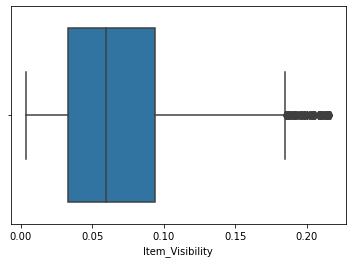

In [75]:
sb.boxplot(df_combinedata['Item_Visibility'])


Outliers and skewness both are removed from the visibility column

* Scaling the data



In [76]:
from sklearn.preprocessing import MinMaxScaler
MinMax =MinMaxScaler()

In [77]:
df_combinedata.iloc[:,:-2]=MinMax.fit_transform(df_combinedata.iloc[:,:-2])


# Separating the data into train and test 


In [78]:
data_test = df_combinedata.loc[df_combinedata['Source']=='df_test']
data_train = df_combinedata.loc[df_combinedata['Source']=='df_train']


In [79]:
data_test.drop(['Source','Item_Outlet_Sales'],axis=1,inplace=True)
data_train.drop('Source',axis=1,inplace=True)


In [80]:
data_test=data_test.reset_index(drop=True)
data_train=data_train.reset_index(drop=True)


In [81]:
data_test


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.585714,0.964275,0.0,0.018742,0.866667,0.325012,1.000000,0.416667,0.5,0.0,0.333333
1,0.585714,0.222983,1.0,0.163703,0.266667,0.237819,0.222222,0.083333,1.0,0.5,0.333333
2,0.828571,0.598095,0.0,0.450910,0.733333,0.893316,0.000000,0.458333,1.0,1.0,0.000000
3,0.500000,0.164335,0.0,0.055489,0.866667,0.525233,0.222222,0.083333,1.0,0.5,0.333333
4,0.614286,0.538553,1.0,0.540267,0.266667,0.861381,0.555556,1.000000,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
5593,0.285714,0.353974,1.0,0.046602,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
5594,0.314286,0.181304,1.0,0.654833,1.000000,0.585126,0.333333,0.000000,0.5,1.0,0.666667
5595,0.842857,0.324204,0.0,0.328571,0.533333,0.371199,0.777778,0.291667,1.0,0.5,0.333333
5596,0.400000,0.639774,1.0,0.293996,0.200000,0.778154,0.222222,0.083333,1.0,0.5,0.333333


In [82]:
data_train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.271429,0.282525,0.0,0.058583,0.266667,0.927507,1.000000,0.416667,0.5,0.0,0.333333,3735.1380
1,0.028571,0.081274,1.0,0.073759,0.933333,0.072068,0.333333,0.000000,0.5,1.0,0.666667,443.4228
2,0.457143,0.770765,0.0,0.061931,0.666667,0.468288,1.000000,0.416667,0.5,0.0,0.333333,2097.2700
3,0.600000,0.871986,1.0,0.522517,0.400000,0.640093,0.000000,0.458333,1.0,1.0,0.000000,732.3800
4,0.685714,0.260494,0.0,0.254570,0.600000,0.095805,0.111111,0.916667,0.0,1.0,0.333333,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.342857,0.137541,0.0,0.249919,0.866667,0.777729,0.111111,0.916667,0.0,1.0,0.333333,2778.3834
8421,0.528571,0.227746,1.0,0.203885,0.000000,0.326263,0.777778,0.291667,1.0,0.5,0.333333,549.2850
8422,0.771429,0.359929,0.0,0.148478,0.533333,0.228492,0.666667,0.208333,1.0,0.5,0.333333,1193.1136
8423,0.457143,0.158083,1.0,0.665306,0.866667,0.304939,0.333333,0.000000,0.5,1.0,0.666667,1845.5976


# Modelling Phase

Importing neccessary modules and libraries for modelling.




In [83]:
from sklearn.model_selection import train_test_split,cross_val_score

#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as XGB
from xgboost import XGBRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [84]:
x=data_train.iloc[:,:-1]
y=data_train.iloc[:,-1]

In [85]:
#Choosing the best random state using Logistic regression

def randomstate(a,b):
    maxx=0
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.1,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        r2=r2_score(p,ytest)
        if maxx<r2:
            maxx=r2
            j=state
    return j

In [86]:
#Creating list of models and another list mapped to their names

models=[KNeighborsRegressor(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [87]:
def performance(p,ytest,s,n):
    print(MinMax)
    print('Mean Absolute Error is',nps.round(mean_absolute_error(p,ytest),4))
    print('Mean Squared Error is',nps.round(mean_squared_error(p,ytest),4))
    print('Root Mean Squared Error is',nps.round(nps.sqrt(mean_squared_error(p,ytest)),4))
    print('R2 Score is',nps.round(r2_score(p,ytest),4)*100)
    print('Mean of cross validaton Score is',nps.round(nps.mean(s),4))
    print('--------------------------------------------------------------------------')

In [88]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.1,random_state=randomstate(x,y))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),4)*100)
        mcv.append(np.round(np.mean(score),4)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [89]:
createmodels(models,x,y,names)


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,781.6843,1.197587e+06,1094.3433,32.35,50.42
LinearRegression,846.0322,1.279780e+06,1131.2738,18.30,49.81
Lasso,845.6548,1.279157e+06,1130.9982,17.45,49.84
Ridge,845.9203,1.279750e+06,1131.2603,17.99,49.81
ElasticNet,1240.9476,2.412651e+06,1553.2711,-7363.40,12.62
DecisionTreeRegressor,1012.0381,2.068116e+06,1438.0945,28.49,17.57
RandomForestRegressor,754.3208,1.147597e+06,1071.2598,39.57,54.83
AdaBoostRegressor,889.2610,1.326102e+06,1151.5651,8.77,44.31
GradientBoostingRegressor,707.1013,1.032115e+06,1015.9307,40.26,58.71


From above analysis only Random Forest, Gradient Boost and xgboost perform well with r2 scor more than 51 and mean absolute error less than 810.Though the results are not as good therefore we further try to increase the scores by Feature Selection

# Feature selection

Using ANOVA test


In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [91]:
selectionkbest = SelectKBest(score_func=f_classif)
fitmdl = selectionkbest.fit(x,y)

In [92]:
dfscores_ = pd.DataFrame(fitmdl.scores_)
dfcolumns_ = pd.DataFrame(x.columns)
featureScores_ = pd.concat([dfcolumns_,dfscores_],axis=1)
featureScores_.columns = ['Features','Score']  #naming the dataframe columns
featureScores_

,Features,Score
0,Item_Identifier,1.129296
1,Item_Weight,1.135301
2,Item_Fat_Content,1.164510
3,Item_Visibility,1.163686
4,Item_Type,1.195552
5,Item_MRP,3.497038
6,Outlet_Identifier,1.190374
7,Outlet_Establishment_Year,1.213252
8,Outlet_Size,1.059711
9,Outlet_Location_Type,1.037075


In [93]:
featureScores_.sort_values(by=['Score'],ascending=False)


,Features,Score
5,Item_MRP,3.497038
10,Outlet_Type,2.105619
7,Outlet_Establishment_Year,1.213252
4,Item_Type,1.195552
6,Outlet_Identifier,1.190374
2,Item_Fat_Content,1.164510
3,Item_Visibility,1.163686
1,Item_Weight,1.135301
0,Item_Identifier,1.129296
8,Outlet_Size,1.059711


The best features with there score in order after going through anova test

Using Feature Importances of Extra Trees Regressor

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
modelET = ExtraTreesRegressor()
modelET.fit(x,y)

ExtraTreesRegressor()

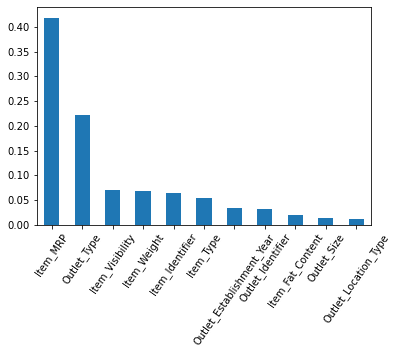

In [95]:
#plot graph of feature importances for better visualization
feat_imp = pd.Series(modelET.feature_importances_, index=x.columns)
feat_imp.nlargest(11).plot(kind='bar')
plt.xticks(rotation = 55)
plt.show()

MRP, Outlet weight are the most important features.



In [96]:
fi=list(feat_imp.nlargest(11).index)
fi

['Item_MRP',
 'Outlet_Type',
 'Item_Visibility',
 'Item_Weight',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type']

Above fi list contains features in order with most important feature on the top and least important feature below.

Using Lasso Coeficients

In [97]:
from sklearn.model_selection import GridSearchCV


In [98]:
param_gridCV={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
gscv=GridSearchCV(Lasso(),param_gridCV,scoring='neg_mean_squared_error',cv=10)
gscv.fit(x,y)
print(gscv.best_params_)

{'alpha': 1}


In [99]:
gscv=Lasso(alpha=1)
gscv.fit(x,y)

Lasso(alpha=1)

In [100]:
importance = np.abs(gscv.coef_)


In [101]:
dfcolumns_ = pd.DataFrame(x.columns)
df_imp=pd.DataFrame(importance)
featureScores_ = pd.concat([dfcolumns_,df_imp],axis=1)
featureScores_.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores_

,Features,Coefficients
0,Item_Identifier,1.285009
1,Item_Weight,0.407180
2,Item_Fat_Content,54.896605
3,Item_Visibility,288.050471
4,Item_Type,0.000000
5,Item_MRP,3688.687459
6,Outlet_Identifier,480.175374
7,Outlet_Establishment_Year,10.105770
8,Outlet_Size,245.169423
9,Outlet_Location_Type,231.092324


In [102]:
featureScores_.sort_values(by=['Coefficients'],ascending=False)


,Features,Coefficients
5,Item_MRP,3688.687459
10,Outlet_Type,2479.052611
6,Outlet_Identifier,480.175374
3,Item_Visibility,288.050471
8,Outlet_Size,245.169423
9,Outlet_Location_Type,231.092324
2,Item_Fat_Content,54.896605
7,Outlet_Establishment_Year,10.105770
0,Item_Identifier,1.285009
1,Item_Weight,0.407180


Item_Type has coefficient 0 signify that is it has less important feature according to Lasso coefficient



Conclusion

Anova test and feature importances tell us that Outlet_Location_Type is the least significant feature.

Feature sekection tells us that Item_Type is the least significant feature

In [103]:
t1=x.drop('Outlet_Location_Type',axis=1)
t2=x.drop('Item_Type',axis=1)
t3=x.drop(['Outlet_Location_Type','Item_Type'],axis=1)

In [104]:
#Testing x1 dataset
createmodels(models,t1,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,778.8889,1.183839e+06,1088.0435,33.43,50.40
LinearRegression,846.7521,1.281995e+06,1132.2523,17.98,49.75
Lasso,846.3794,1.281344e+06,1131.9644,17.17,49.77
Ridge,846.6260,1.281960e+06,1132.2368,17.69,49.75
ElasticNet,1242.2934,2.417359e+06,1554.7860,-7895.78,12.44
DecisionTreeRegressor,989.9119,2.055472e+06,1433.6916,24.72,16.65
RandomForestRegressor,756.4936,1.143024e+06,1069.1232,39.18,54.62
AdaBoostRegressor,843.4033,1.240882e+06,1113.9488,21.14,44.45
GradientBoostingRegressor,707.1519,1.028495e+06,1014.1474,40.64,58.70


In [105]:
#Testing x2 dataset
createmodels(models,t2,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,766.0698,1.168356e+06,1080.9052,38.07,50.78
LinearRegression,845.9065,1.279598e+06,1131.1933,18.30,49.82
Lasso,845.6499,1.279150e+06,1130.9951,17.45,49.84
Ridge,845.7985,1.279572e+06,1131.1815,17.99,49.82
ElasticNet,1241.0849,2.412780e+06,1553.3125,-7362.03,12.62
DecisionTreeRegressor,1011.0904,2.078646e+06,1441.7512,26.07,15.30
RandomForestRegressor,756.9860,1.157680e+06,1075.9555,38.21,54.83
AdaBoostRegressor,926.2768,1.403351e+06,1184.6311,3.37,44.67
GradientBoostingRegressor,706.5613,1.037251e+06,1018.4551,39.80,58.77


In [106]:
#Testing x3 dataset
createmodels(models,t3,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,763.7667,1.150082e+06,1072.4186,39.39,50.80
LinearRegression,846.6375,1.281824e+06,1132.1768,17.98,49.76
Lasso,846.3727,1.281335e+06,1131.9607,17.17,49.78
Ridge,846.5151,1.281792e+06,1132.1628,17.69,49.76
ElasticNet,1242.4271,2.417496e+06,1554.8300,-7892.02,12.44
DecisionTreeRegressor,1011.4837,2.147772e+06,1465.5278,23.59,14.48
RandomForestRegressor,761.1785,1.184050e+06,1088.1405,37.78,54.84
AdaBoostRegressor,920.0695,1.376748e+06,1173.3491,7.40,44.10
GradientBoostingRegressor,705.5322,1.031194e+06,1015.4771,40.09,58.67


From above analysis we see that previous models which were performimng well are the one performing well even this time and the dataset providing least Root errors and highest mean cross validation score is Dataset x2 which we get after removing Item_Type which we got using feature selection of Lasso, even though results do not vary much even after doing feature selection so we will keep the original dataset for training purposes without loosing any data.

# Hyperparameter Tuning


We will use the hyper parameter tuning for only Xtreme Gradient Boost since the R2 Score and Mean Cross Validation Score is high enough to predict the data



In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [111]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [112]:
xgboost=RandomizedSearchCV(XGBRegressor(),params,cv=5)

In [119]:
xgboost.fit(xtrain,ytrain)

NameError: name 'xtrain' is not defined

In [120]:
print(xgboost.best_estimator_)
print(xgboost.best_params_)
print(xgboost.best_score_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [121]:
xgbr=XGBRegressor(colsample_bytree= 0.7, gamma= 0.1, learning_rate=0.05, max_depth=5, min_child_weight= 3)
xgbr.fit(xtrain,ytrain)
p=xgbr.predict(xtest)

NameError: name 'xtrain' is not defined

In [122]:
score=cross_val_score(xgbr,x,y,cv=10)


In [123]:
print('Mean Absolute Error-->',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error-->',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error-->',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score-->',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score-->',np.round(np.mean(score)*100,4))

NameError: name 'ytest' is not defined

# Conclusion

The best model with least error and highest R2 score and Cross_Validation_Score after hyperparameter tuning is Gradient Boost Regressor

# Finalizing the best model


In [124]:
model=GradientBoostingRegressor(learning_rate=0.05, subsample=1,max_depth= 3,n_estimators=100 )
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(xgboost,x,y,cv=10)

NameError: name 'xtrain' is not defined

# Evaluation Metrics


In [125]:
print('Mean Absolute Error-->',np.round(mean_absolute_error(p,ytest),5))
print('Mean Squared Error-->',np.round(mean_squared_error(p,ytest),5))
print('Root Mean Squared Error-->',np.round(np.sqrt(mean_squared_error(p,ytest)),5))
print('R2 Score-->',np.round(r2_score(p,ytest),5)*100)
print('Mean of cross validaton Score-->',np.round(np.mean(score)*100,5))

NameError: name 'ytest' is not defined

In [126]:
plt.scatter(x=ytest,y=p,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Sales In Big Mart')
plt.ylabel('Predicted Sales for Big Mart')
plt.title('Gradient Boost Regressor(Classifier)')

NameError: name 'ytest' is not defined

Still a lot of outliers in our output

# Saving the model



In [127]:
import joblib
joblib.dump(model,'BigMartSales.pkl')

['BigMartSales.pkl']

#  Predicting the test dataset
  

In [128]:
predtion=model.predict(data_test)

predtion


NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Saving the predictions

In [129]:
predtion=pd.DataFrame(predtion)


NameError: name 'predtion' is not defined

In [130]:
predtion.to_csv('prediction_test_data_csv.csv')


NameError: name 'predtion' is not defined